<a href="https://colab.research.google.com/github/udaykondreddy/Code-for-learn-machinelearning/blob/master/word_embeddings/word2vec/word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from gensim.models import Word2Vec
import pandas as pd
from nltk.stem import WordNetLemmatizer
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import pickle
from sklearn.metrics import pairwise_distances  
from sklearn.metrics.pairwise import cosine_similarity

About data - i will be using an airline twitter data which i downloaded

In [ ]:
#load data
dataset = pd.read_csv('tweets@7k.csv')

In [ ]:
#data preprocessing like removing special letters, usernames, URL's etc...
corpus = []
for i in range(0, 7000):
    review= dataset['Tweet'][i]
    #review = re.sub('@[\w\d]*','',dataset['Tweet'][i])
    if "#" in review:
        review = list(review)
        review.remove("#")
        review.remove("@")                     
        review = "".join(review)
    review = re.sub('(?:https://|http://)[\w\d\.\/]*','',review).strip()
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
#review = ' '.join(review)
    corpus.append(review)

In [ ]:
len(corpus)

7000

In [ ]:
#train model
'''
Important parameters
min_count: Ignores all words with total frequency lower than this.
size: Dimensionality of the word vectors.
window: Maximum distance between the current and predicted word within a sentence.
sg: {0, 1}, Training algorithm: 1 for skip-gram; otherwise CBOW.
iter: Number of iterations (epochs) over the corpus.
'''

model = Word2Vec(corpus, min_count = 1, size = 300, window = 2, sg = 1, iter = 30)


In [ ]:
# summarize vocabulary
words = list(model.wv.vocab)

In [ ]:
#Exploring the model

#get all vectors from the model
vectors = model[model.wv.vocab]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [ ]:
#Find Most similar words for a given word
model.wv.most_similar(positive=["bad"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('piss', 0.626111626625061),
 ('poorservice', 0.6241046190261841),
 ('angry', 0.5989573001861572),
 ('efficiency', 0.5917342901229858),
 ('screensand', 0.5912884473800659),
 ('dis', 0.5886995792388916),
 ('unbelievably', 0.5836389064788818),
 ('blankets', 0.5818508267402649),
 ('rotten', 0.5797359943389893),
 ('spot', 0.5785980224609375)]

In [ ]:
#Find similar score between two words 
model.wv.similarity("good", 'bad')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.36764294

In [ ]:
model.wv.similarity("piss", 'bad')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.6261116

In [ ]:
# Lets visualize the data using PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

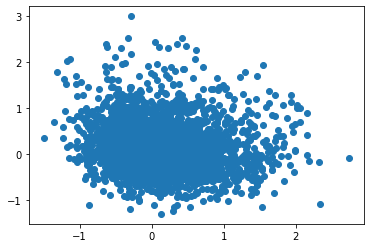

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(result[:, 0], result[:, 1])

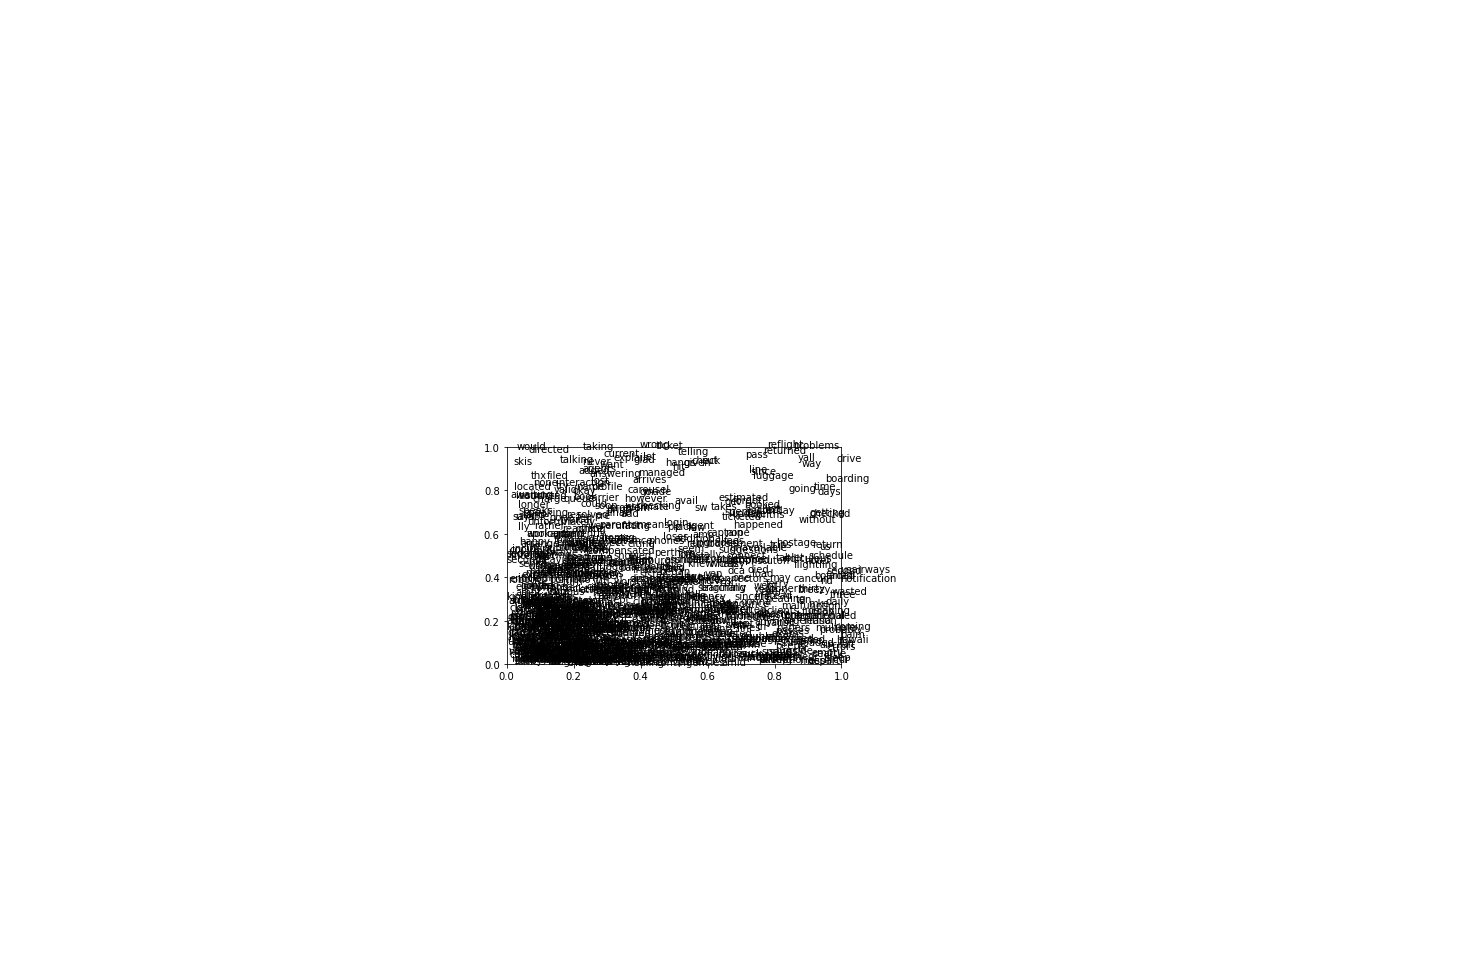

In [ ]:
#annotate words with recpective vector
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))